In [30]:
#Used Dr. Bianco's python notebook as a template for my notebook.

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

Populating the interactive namespace from numpy and matplotlib


In [31]:
datestring = '201605'
getCitiBikeCSV(datestring)

file in place, you can continue


IDEA

More tourists ride Citibike on the weekends compared to that on weekdays. I have assumed that customers are tourists and subscribers are local.

NULL HYPOTHESIS

The proportion of customers biking on weekends is the same or lower than the proportion of subscribers biking on weekends

ALTERNATIVE HYPOTHESIS

The proportion of customers biking on weekends is the higher than the proportion of subscribers biking on weekends

$H_0: \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} >= \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

$H_1: \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} < \frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}}$

I will use a significance level  $\alpha=0.05$

In [32]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26


In [33]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'gender',
       'birth year'], axis=1, inplace=True)

In [34]:
df.head(10)

,usertype,date
0,Subscriber,2016-05-01 00:00:03
1,Subscriber,2016-05-01 00:00:04
2,Subscriber,2016-05-01 00:00:14
3,Customer,2016-05-01 00:00:20
4,Subscriber,2016-05-01 00:00:26
5,Subscriber,2016-05-01 00:00:33
6,Subscriber,2016-05-01 00:00:34
7,Subscriber,2016-05-01 00:00:37
8,Subscriber,2016-05-01 00:00:42
9,Subscriber,2016-05-01 00:00:50


Text(0.5,1,'Number of rides taken by subscribers and customers in May 2016')

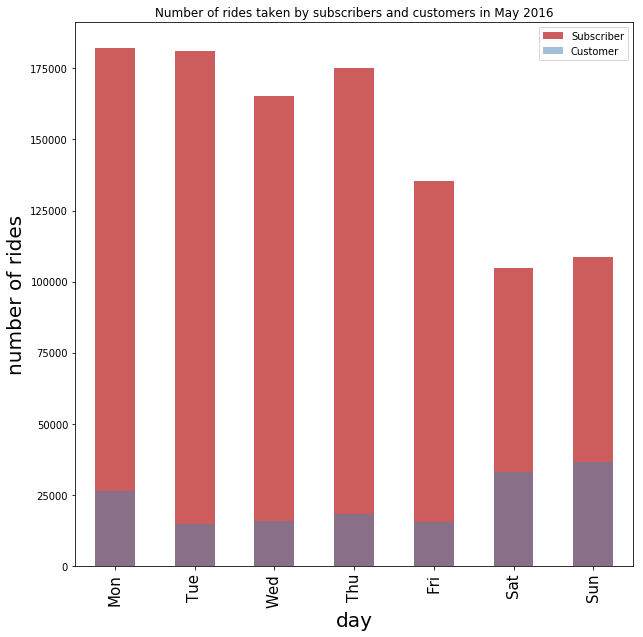

In [35]:
fig = pl.figure(figsize(10,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Subscriber')


ax = ((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count())).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=15)
pl.ylabel('number of rides', size = '20')
pl.xlabel('day', size = '20')
pl.legend()
pl.title('Number of rides taken by subscribers and customers in May 2016')

Figure 1: The distribution of the Citibike riders by user type in May 2016, absolute counts

One can see that customers, who are assumed to be tourists take more rides on the weekend compared to subscribers, who are assumed to be locals

In [36]:
subscribers = ((df['date'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday]).count()))
subscribers.head(9)

date
0    182021
1    180984
2    165352
3    175031
4    135292
5    104795
6    108791
Name: date, dtype: int64

In [37]:
customers = ((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()))
customers.head(9)

date
0    26224
1    14671
2    15690
3    18460
4    15439
5    33087
6    36443
Name: date, dtype: int64

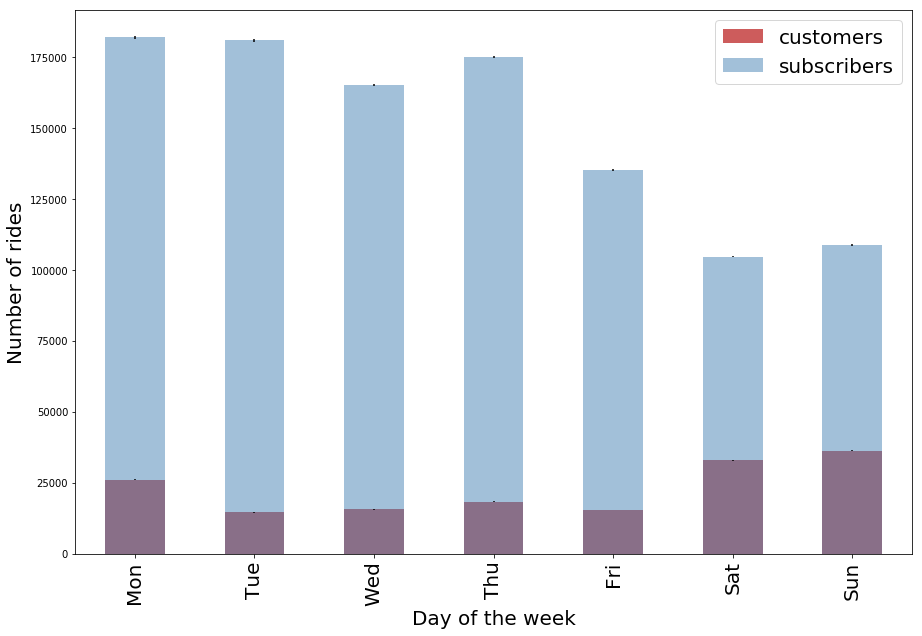

In [38]:
fig=pl.figure(figsize(15,10))

counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='customers')


counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='subscribers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides", size = 20)
ax.set_xlabel ("Day of the week", size = 20)
pl.legend(['customers','subscribers'],fontsize=20)

Figure 1b: Distribution of Citibike riders by user type in May 2016, absolute counts, with statistical errors

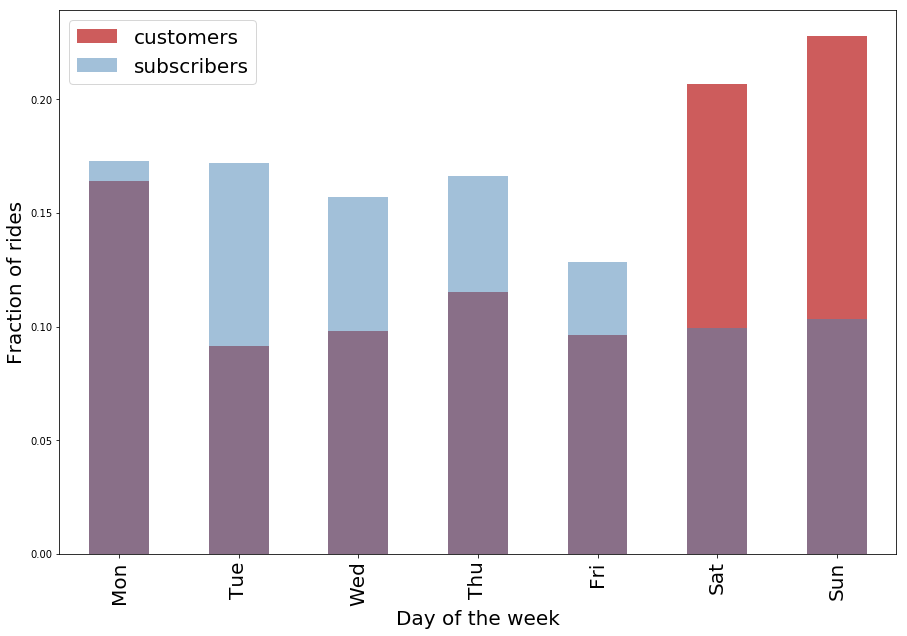

In [39]:
fig = pl.figure(figsize(15,10))

norm_c = counts_c.sum()
ax = ((counts_c) / norm_c).plot(kind="bar", color='IndianRed', 
                           label='customers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                color='SteelBlue', label='subscribers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", size = 20)
ax.set_xlabel ("Day of the week", size = 20)

pl.legend(['customers','subscribers'],fontsize=20)

Figure 1c: Distribution of Citibike riders by user type, normalized